## Final Project Submission

Please fill out:
* Student name: Aaron Feinberg
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


### Customer Churn Data 

Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. Note that this is a binary classification problem.

Most naturally, your audience here would be the telecom business itself, interested in losing money on customers who don't stick around very long. Are there any predictable patterns here?

# Obtain and Scrub

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Sci-kit Learn Essentials
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Imputer, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing
from pylab import rcParams

# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier




In [2]:
df = pd.read_csv('churn_data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# get the number of rows and columns
print(df.shape)

# get datetype info
print()
print(df.info())

(3333, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-

3,333 unique customers with 21 characteristics

In [4]:
df['churn'].astype(float, inplace=True)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Categorical Variables

State, Area Code, International Plan, Voice Mail Plan, Churn all should be placed into categories 

In [6]:
label_encoder = preprocessing.LabelEncoder()

df['state'] = label_encoder.fit_transform(df['state'])
df['area code'] = label_encoder.fit_transform(df['area code'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null int64
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
cu

In [8]:
df.describe()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,1.000600,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,0.709649,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,0.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,1.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,2.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,2.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Off the bat you can see there are some pretty large std. in total minutes and calls throughout the day

### Standardize Variables 

In [9]:
variables = ['total day minutes', 'total day calls', 'total day charge',
      'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
      'total intl minutes', 'total intl calls', 'total intl charge','number vmail messages']
def normalize(x):
    for x in variables:
        df[x] = ((df[x]-df[x].min())/(df[x].max()-df[x].min()))


In [10]:
normalize('total night calls')

In [11]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,1,382-4657,0,1,0.490196,0.755701,0.666667,0.755701,...,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,1,0
1,35,107,1,371-7191,0,1,0.509804,0.460661,0.745455,0.460597,...,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,1,0
2,31,137,1,358-1921,0,0,0.000000,0.693843,0.690909,0.693830,...,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0,0
3,35,84,0,375-9999,1,0,0.000000,0.853478,0.430303,0.853454,...,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,2,0
4,36,75,1,330-6626,1,0,0.000000,0.475200,0.684848,0.475184,...,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,3,0


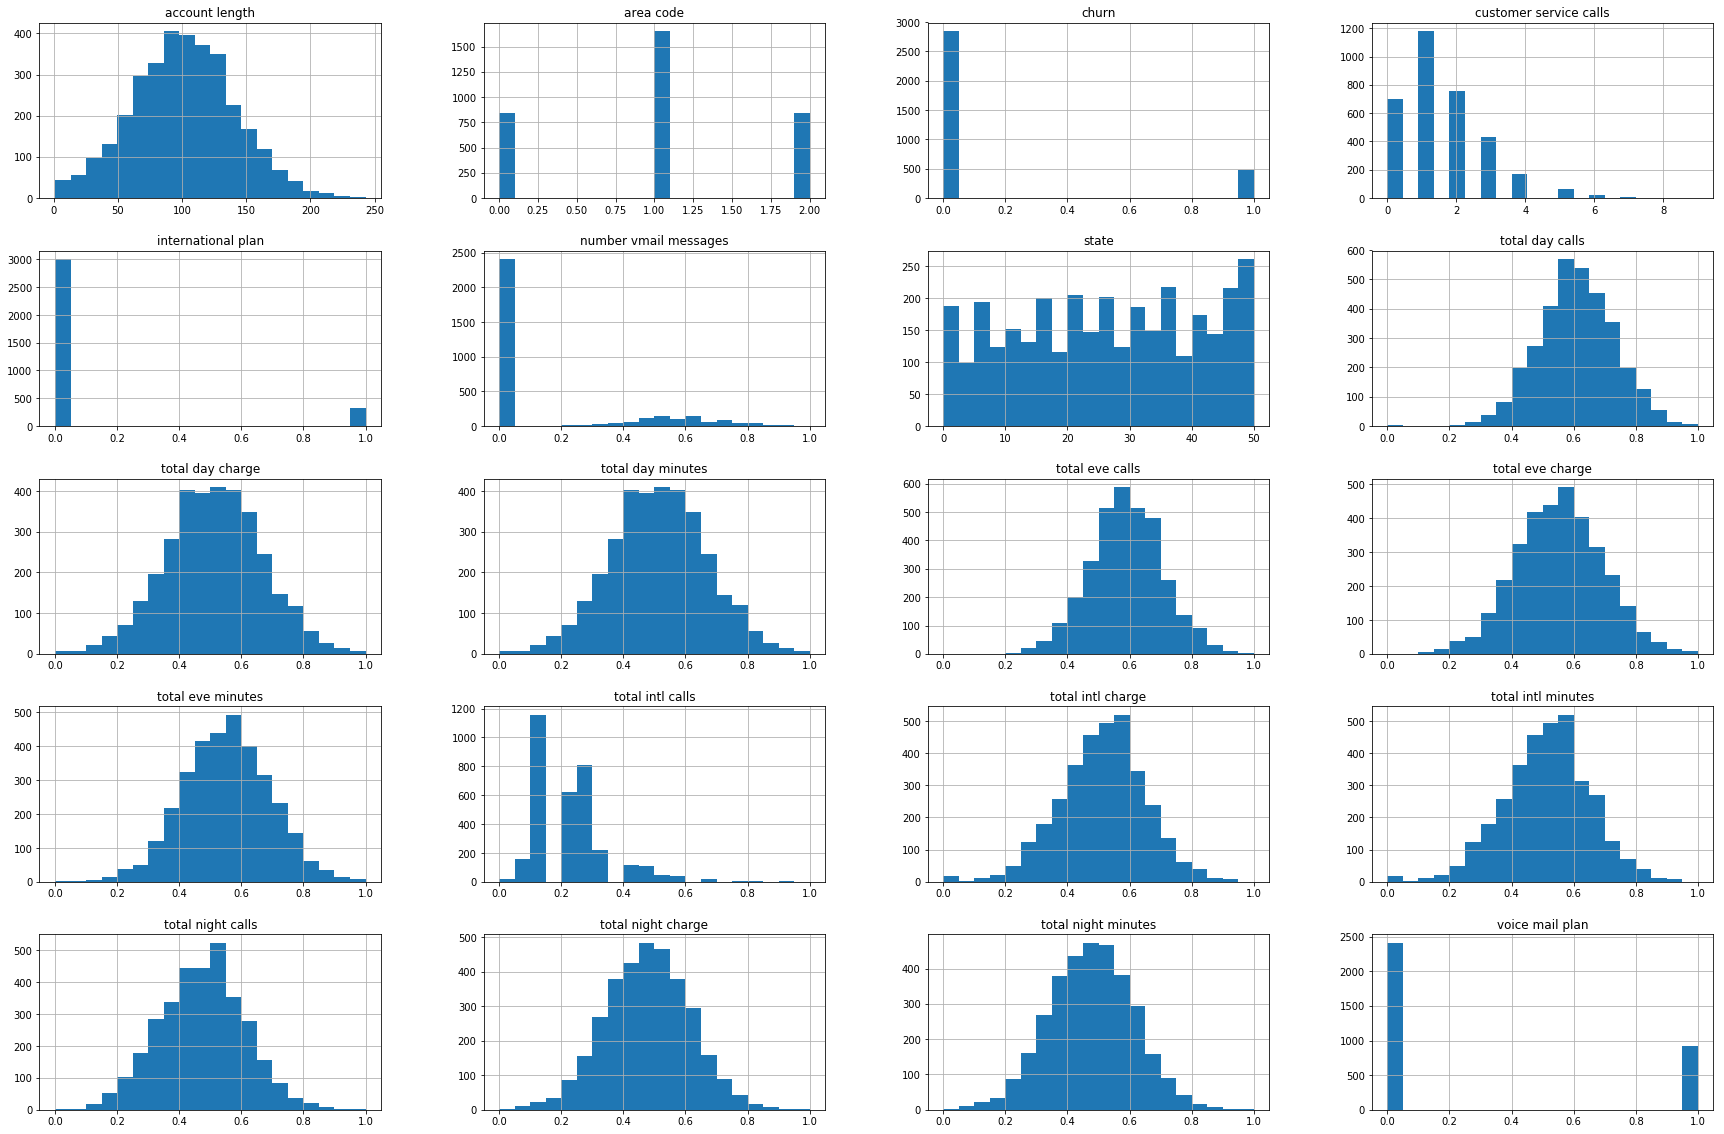

In [12]:
df.hist(figsize=(30,20), bins=20);

### Remove Variables 

Phone number and area code are uncessary variables here

In [13]:
df.drop(['phone number'], axis=1, inplace=True)
df.drop(['area code'], axis=1, inplace=True)

### Missing Values

In [14]:
#Checking for missing data 
df.isna().sum()

state                     0
account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No Missing data

In [15]:
##Lets just move the churn column to the front of the dataframe for simplicity
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [16]:
df.head()

,churn,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,0,16,128,0,1,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,1
1,0,35,107,0,1,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,1
2,0,31,137,0,0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0
3,0,35,84,1,0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,2
4,0,36,75,1,0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,3


# Explore

Proportional makeup of customer churn

0    2850
1     483
Name: churn, dtype: int64

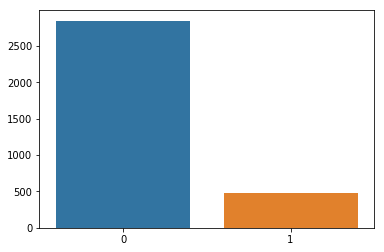

In [17]:
y = df["churn"].value_counts()
sns.barplot(y.index, y.values)
y

483 total chruned customers of the 3,333 unique customers

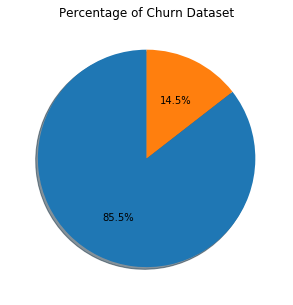

In [18]:
#let's create a better visualization
sizes = df['churn'].value_counts(sort = True)
colors = ["blue","orange"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Percentage of Churn Dataset')
plt.show()

### State by State Churn ratio

Clear that certain states have a higher churn rate than others 

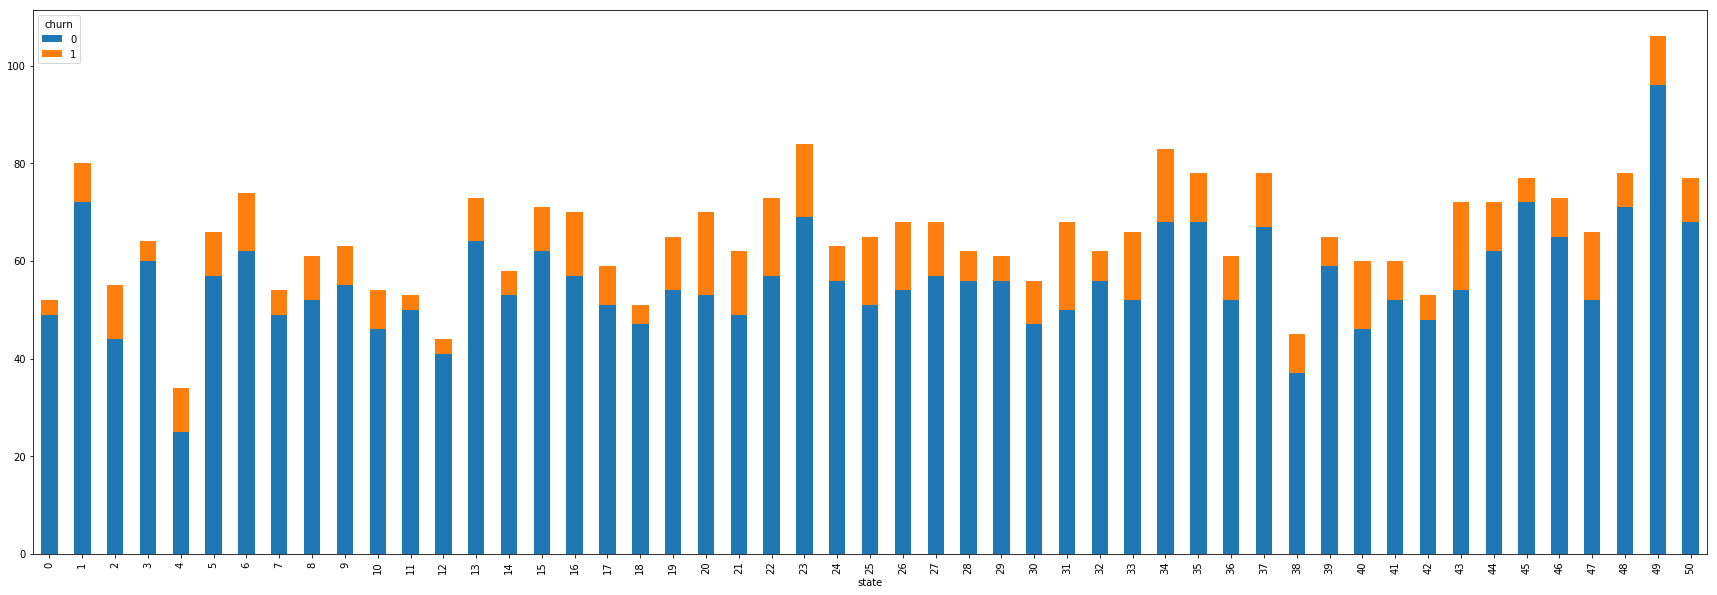

In [19]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

### Churn by customers with International Plan

No clear trend here

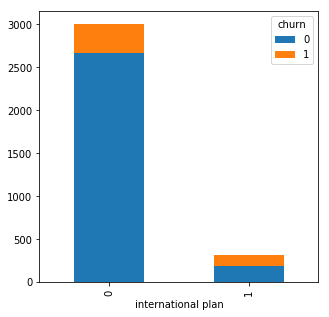

In [20]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

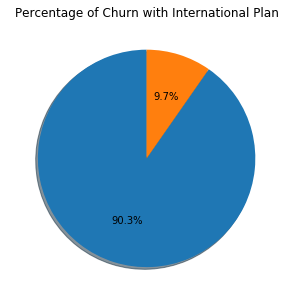

In [21]:
sizes = df['international plan'].value_counts(sort = True)
colors = ["blue","orange"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Percentage of Churn with International Plan')
plt.show()

### Churn by amount of Customer Service calls

Insight here is that it appears that once someone hits 4+ customer service calls it appears they have over a 50% chance of churning 

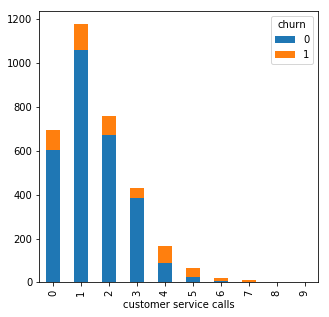

In [22]:
df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn by number of voicemail plan 

Clear trend that there is a correlation here. If they do not have a voice mail plan set, up there is a much higher chance they will churn 

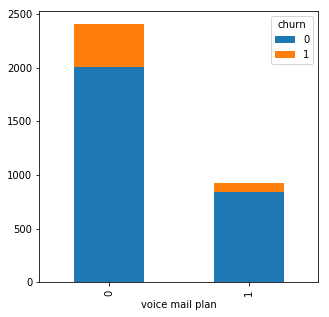

In [23]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

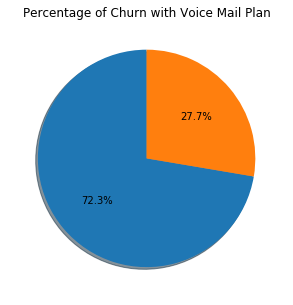

In [24]:
sizes = df['voice mail plan'].value_counts(sort = True)
colors = ["blue","orange"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Percentage of Churn with Voice Mail Plan')
plt.show()

### Average Total Day Charge + Calls

In [25]:
def plot_dist(feature):
    sns.set_style('ticks')
    s = sns.FacetGrid(df, hue = 'churn',aspect = 2.5, palette = {1 : 'Lightblue',0 : 'gold'})
    s.map(sns.kdeplot, feature, shade = True, alpha = .8)
    s.set(xlim=(0,df[feature].max()))
    s.add_legend()
    s.set_axis_labels(feature, 'proportion')
    s.fig.suptitle(feature)
    plt.show()

/Users/afeinberg/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


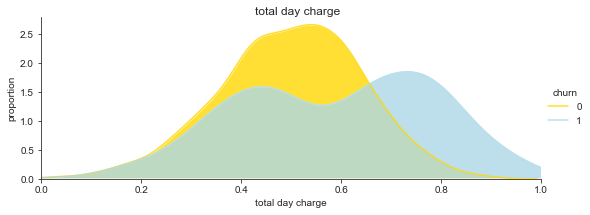

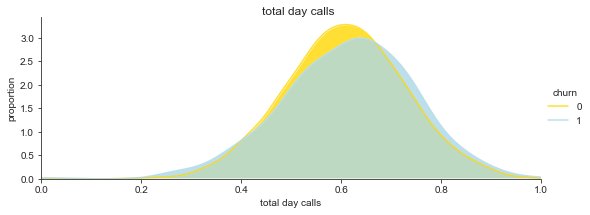

In [26]:
plot_dist('total day charge')
plot_dist('total day calls')


### Total Eve Minutes

/Users/afeinberg/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


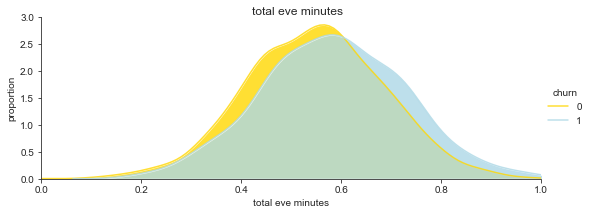

In [27]:
plot_dist('total eve minutes')

### Heatmap for Correlation

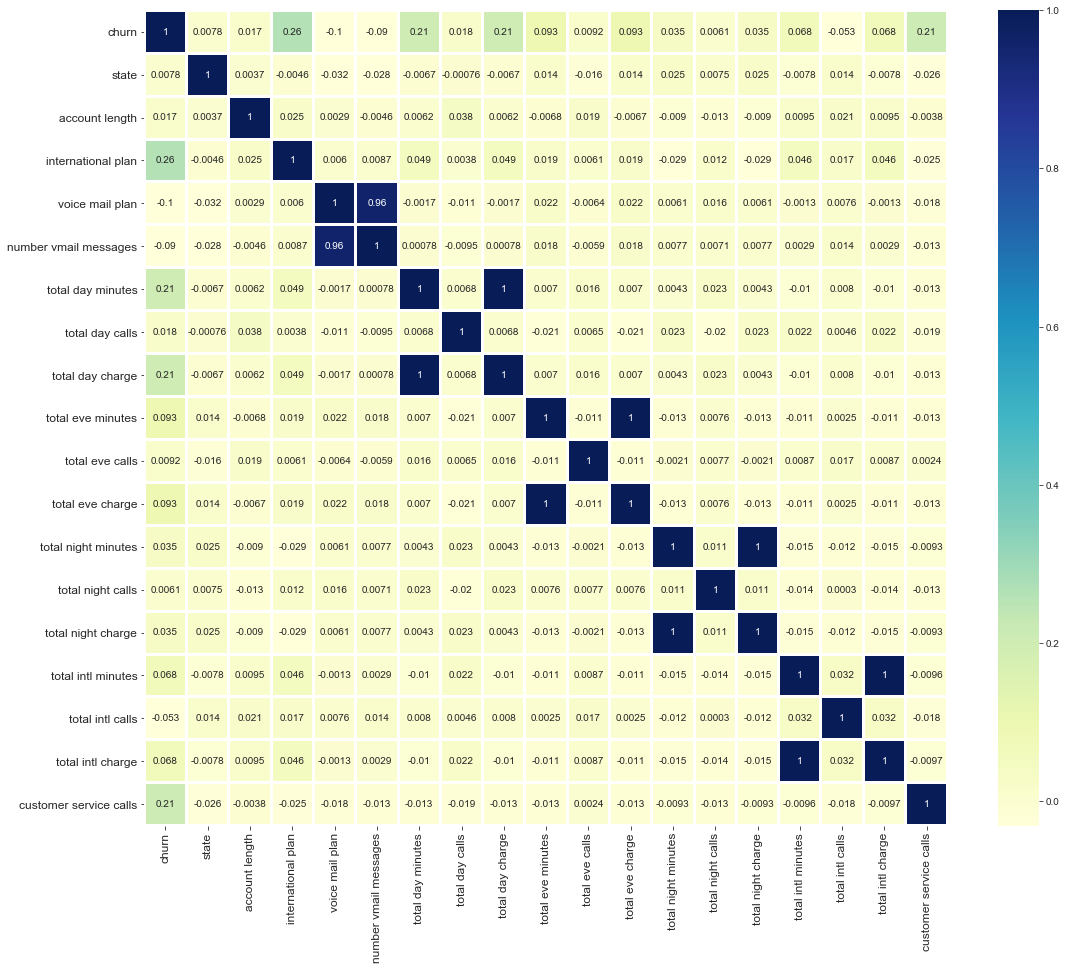

In [28]:
corr = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr, fmt='.2g', cmap = 'YlGnBu', annot = True, linewidth = 2, robust = True)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

Some clear co-linear patterns here that are fairly logicl. Let's clean these up.

In [29]:
#Number of Voice Mail Messages Vs. Voicemail plan
#Let's drop Number of Voice Mail
df.drop(['number vmail messages'], axis=1, inplace=True)

#Total Day Charge Vs. Total Day minutes
#Let's drop total day minutes 
df.drop(['total day minutes'], axis=1, inplace=True)


#Total Eve Charge Vs. Total Eve minutes
#Let's drop total eve charge 
df.drop(['total eve charge'], axis=1, inplace=True)

#Total Night Charge Vs. Total Night Minutes 
#Let's drop total night minutes 
df.drop(['total night minutes'], axis=1, inplace=True)

#Total Intl Charge vs. total intl Min
#Lets drop total intl charge
df.drop(['total intl charge'], axis=1, inplace=True)


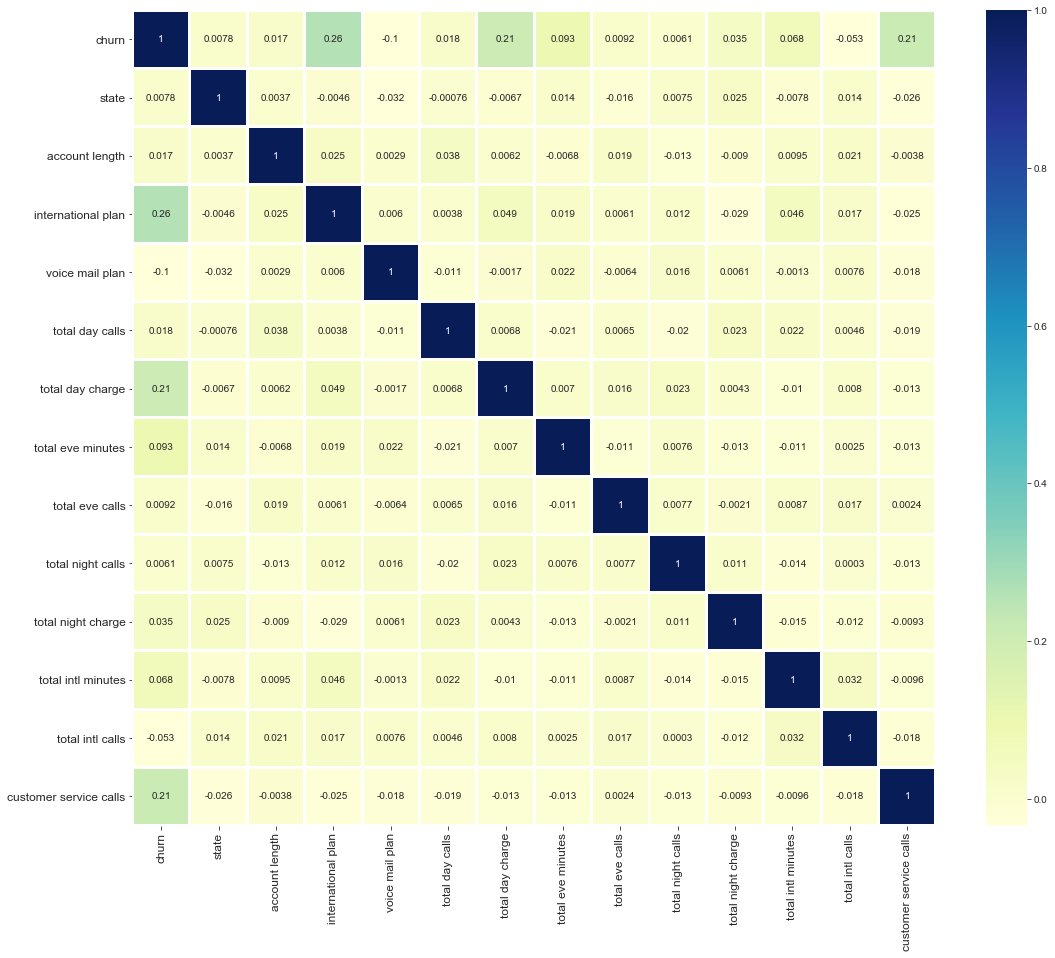

In [30]:
#Take a look at our new data
corr = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr, fmt='.2g', cmap = 'YlGnBu', annot = True, linewidth = 2, robust = True)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

# Model

Classification is the process of predicting the class of given data points.

### K Nearest Neighbors

KNN is a distance-based classifier, meaning that it implicitly assumes that the smaller the distance between two points, the more similar they are.

In [31]:
labels = df['churn']
labels_removed_df = df.drop('churn', axis=1, inplace=False)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(labels_removed_df)

/Users/afeinberg/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/afeinberg/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
data_train, data_test, target_train, target_test = train_test_split(df, labels, test_size=0.25, random_state=42)

In [33]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(data_train)
scaled_data_test = scaler.transform(data_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=df.columns)
scaled_df_train.head()

/Users/afeinberg/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/afeinberg/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/afeinberg/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,churn,state,account length,international plan,voice mail plan,total day calls,total day charge,total eve minutes,total eve calls,total night calls,total night charge,total intl minutes,total intl calls,customer service calls
0,-0.408915,-0.415515,-1.404508,-0.327448,-0.611418,1.330852,-1.884170,1.037727,0.401340,0.004940,1.071757,2.768109,-0.595235,-0.427903
1,-0.408915,-1.226162,0.366388,-0.327448,-0.611418,0.529165,0.293703,0.516178,0.401340,0.670832,2.212569,1.051970,-1.417963,0.324616
2,-0.408915,0.665348,0.518179,-0.327448,1.635543,-1.875896,1.056666,0.093407,0.849774,-0.763398,-0.077797,-0.056369,0.227493,1.829653
3,-0.408915,0.868010,2.010792,-0.327448,-0.611418,1.681590,-0.679320,-0.402459,0.650470,-0.660953,-0.322569,-0.056369,-0.183871,-0.427903
4,-0.408915,0.732902,0.290493,-0.327448,-0.611418,1.080325,0.484172,-0.718549,-0.296224,0.056162,-1.188013,0.837453,1.050221,1.077134


In [34]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf_knn = KNeighborsClassifier()

# Fit the classifier
clf_knn.fit(scaled_data_train, target_train)

# Predict on the test set
test_preds = clf_knn.predict(scaled_data_test)

In [35]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [39]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(target_test, test_preds)

Precision Score: 1.0
Recall Score: 0.992
Accuracy Score: 0.9988009592326139
F1 Score: 0.9959839357429718


In [44]:
#tune hyperparameters
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = clf_knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [46]:
find_best_k(scaled_data_train, target_train, scaled_data_test, target_test)

Best Value for k: 1
F1-Score: 0.9959839357429718


### Random Forest 

The random forest algorithm is an ensemble of decision trees.

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(labels_removed_df, labels, 
                                                                    test_size = 0.25, random_state=123)

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

In [ ]:
tree_clf.feature_importances_

In [ ]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [ ]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

In [ ]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))


### XGboost

XGBoost is a great choice for classification tasks. It provides best-in-class performance compared to other classification algorithms

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, labels)

In [ ]:
clf_xg = xgb.XGBClassifier()

In [ ]:
clf_xg.fit(X_train, y_train)

In [ ]:
training_preds = clf_xg.predict(X_train)

In [ ]:
val_preds = clf_xg.predict(X_test)

In [ ]:
training_accuracy = accuracy_score(y_train, training_preds)


In [ ]:
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [ ]:
y_pred = clf_xg.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
scores = clf_xg.get_booster().get_score(importance_type='weight') 


In [ ]:
column_names = ['churn', 'state', 'account length', 'international plan',
       'voice mail plan', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'customer service calls']
mapper = {'f{0}'.format(i): v for i, v in enumerate(column_names)}
mapper

In [ ]:
mapped_names = {mapper[k]: v for k, v in scores.items()}

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(mapped_names, ax=ax)

# Interpret

KNN, a distance based classifier, gives us the strongest model testing results. 

Most important features are total day calls and total day charge


We have a 1.0 Precision score indicating that we are strong in understanding our churn customers and how many of them will actually churn. Precision is a good measure to determine, when the costs of False Positive is high.

We have a .992 recall score which calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive)

Our F1 score which is the most important metric for this data set is at 99.5% for the KNN model. This is the balance of Presicison and recall and is especially useful with a bulk amount of negative cases - such as in this fataset where 85.5% are negative and not churning. 


Something to consider for future would be to combine all of the minutes together and create a new column for them